# New York City's 311 service from 2010 to the present 

In [5]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
import seaborn as sns

In [6]:
#importing the data set 
df = pd.read_csv('CustomerServiceRequests.csv',low_memory=False)

In [10]:
#showing rows and columns of the data set
df.shape

(300698, 53)

In [22]:
#showing the first two rows of the data set
df.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"


In [24]:
#showing the last two rows of the data set
df.tail(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"
300697,30281825,03/29/2015 12:33:01 AM,03/29/2015 04:41:50 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10036.0,251 WEST 48 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.760583,-73.985922,"(40.76058322950115, -73.98592204392392)"


In [7]:
#summary of the data frame
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [161]:
#statistical summary of data frame
df.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.006980e+05,298083.000000,2.971580e+05,297158.000000,0.0,0.0,0.0,0.0,0.0,297158.000000,297158.000000
mean,3.130054e+07,10848.888645,1.004854e+06,203754.534416,NaN,NaN,NaN,NaN,NaN,40.725885,-73.925630
std,5.738547e+05,583.182081,2.175338e+04,29880.183529,NaN,NaN,NaN,NaN,NaN,0.082012,0.078454
min,3.027948e+07,83.000000,9.133570e+05,121219.000000,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937
25%,3.080118e+07,10310.000000,9.919752e+05,183343.000000,NaN,NaN,NaN,NaN,NaN,40.669796,-73.972142
50%,3.130436e+07,11208.000000,1.003158e+06,201110.500000,NaN,NaN,NaN,NaN,NaN,40.718661,-73.931781
75%,3.178446e+07,11238.000000,1.018372e+06,224125.250000,NaN,NaN,NaN,NaN,NaN,40.781840,-73.876805
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700760


In [162]:
#null values of data frame
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [163]:
#displaying the datatype of 'Created Date' column
print(df['Created Date'].dtype)
#displaying the datatype of 'Closed Date' column
print(df['Closed Date'].dtype)

object
object


In [12]:
#converting the 'Created Date' column into date time datatype
df['Created Date'] = pd.to_datetime(df['Created Date'],format = '%Y-%m-%d')
print(df['Created Date'].dtype)

datetime64[ns]


In [15]:
#converting the 'Created Date' column into date time datatype
df['Closed Date'] = pd.to_datetime(df['Closed Date'],format = '%Y-%m-%d')
print(df['Closed Date'].dtype)

datetime64[ns]


In [279]:
#creating new column with time difference
df['Request_Closing_Time'] = df['Closed Date'] - df['Created Date']
df['Request_Closing_Time'].head(3)

0   0 days 00:55:15
1   0 days 01:26:16
2   0 days 04:51:31
Name: Request_Closing_Time, dtype: timedelta64[ns]

In [203]:
#dropping irrelevant columns temporarily
df.drop(['Agency Name','Incident Address','Street Name','Cross Street 1',
                'Cross Street 2','Intersection Street 1', 'Intersection Street 2',
                'Address Type','Park Facility Name','Park Borough','School Name', 
                'School Number','School Region','School Code','School Phone Number',
                'School Address','School City','School State','School Zip','School Not Found',
                'School or Citywide Complaint','Vehicle Type', 'Taxi Company Borough',
                'Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction',
                'Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction',
                'Ferry Terminal Name','Landmark','X Coordinate (State Plane)','Y Coordinate (State Plane)',
                'Due Date','Resolution Action Updated Date','Community Board','Facility Type','Location'],axis=1).columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City', 'Status',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude',
       'Request_Closing_Time'],
      dtype='object')

In [205]:
#showing the number of columns of the data frame after dropping temporarily
len(df.columns)

54

In [207]:
#showing the columns of the data frame after dropping temporarily
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [209]:
#dropping irrelevant columns permanently
df.drop(['Agency Name','Incident Address','Street Name','Cross Street 1',
                'Cross Street 2','Intersection Street 1', 'Intersection Street 2',
                'Address Type','Park Facility Name','Park Borough','School Name', 
                'School Number','School Region','School Code','School Phone Number',
                'School Address','School City','School State','School Zip','School Not Found',
                'School or Citywide Complaint','Vehicle Type', 'Taxi Company Borough',
                'Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction',
                'Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction',
                'Ferry Terminal Name','Landmark','X Coordinate (State Plane)','Y Coordinate (State Plane)',
                'Due Date','Resolution Action Updated Date','Community Board','Facility Type','Location'],axis=1,inplace=True)

In [211]:
#showing the number of columns of the data frame after dropping permanently
len(df.columns)

15

In [213]:
#showing the columns of the data frame after dropping permanently
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City', 'Status',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude',
       'Request_Closing_Time'],
      dtype='object')

In [215]:
#checking the NaN missing values from updated dataframe
df.isnull().sum()

Unique Key                   0
Created Date                 0
Closed Date               2164
Agency                       0
Complaint Type               0
Descriptor                5914
Location Type              131
Incident Zip              2615
City                      2614
Status                       0
Resolution Description       0
Borough                      0
Latitude                  3540
Longitude                 3540
Request_Closing_Time      2164
dtype: int64

In [217]:
#removing the NaN missing values from updated dataframe permanently
df.dropna(inplace=True)

In [219]:
#checking the NaN missing values from updated dataframe after removing it permanently
df.isnull().sum()

Unique Key                0
Created Date              0
Closed Date               0
Agency                    0
Complaint Type            0
Descriptor                0
Location Type             0
Incident Zip              0
City                      0
Status                    0
Resolution Description    0
Borough                   0
Latitude                  0
Longitude                 0
Request_Closing_Time      0
dtype: int64

In [221]:
#checking the number of unique values from all the columns in the data frame
df.nunique()

Unique Key                291107
Created Date              251970
Closed Date               231991
Agency                         1
Complaint Type                15
Descriptor                    41
Location Type                 14
Incident Zip                 200
City                          53
Status                         1
Resolution Description        12
Borough                        5
Latitude                  123013
Longitude                 123112
Request_Closing_Time       47134
dtype: int64

In [223]:
#checking the unique values from Unique Key column in the data frame
df['Unique Key'].unique()

array([32310363, 32309934, 32309159, ..., 30283424, 30280004, 30281825])

In [225]:
#checking the unique values from Created Date column in the data frame
df['Created Date'].unique()

<DatetimeArray>
['2015-12-31 23:59:45', '2015-12-31 23:59:44', '2015-12-31 23:59:29',
 '2015-12-31 23:57:46', '2015-12-31 23:56:58', '2015-12-31 23:56:30',
 '2015-12-31 23:55:32', '2015-12-31 23:54:05', '2015-12-31 23:53:58',
 '2015-12-31 23:52:58',
 ...
 '2015-03-29 00:42:48', '2015-03-29 00:37:15', '2015-03-29 00:35:28',
 '2015-03-29 00:35:23', '2015-03-29 00:35:04', '2015-03-29 00:34:32',
 '2015-03-29 00:33:28', '2015-03-29 00:33:03', '2015-03-29 00:33:02',
 '2015-03-29 00:33:01']
Length: 251970, dtype: datetime64[ns]

In [227]:
#checking the unique values from Closed Date column in the data frame
df['Closed Date'].unique()

<DatetimeArray>
['2016-01-01 00:55:00', '2016-01-01 01:26:00', '2016-01-01 04:51:00',
 '2016-01-01 07:43:00', '2016-01-01 03:24:00', '2016-01-01 01:50:00',
 '2016-01-01 01:53:00', '2016-01-01 01:42:00', '2016-01-01 08:27:00',
 '2016-01-01 01:17:00',
 ...
 '2015-03-29 00:57:23', '2015-03-29 02:57:41', '2015-03-29 01:02:39',
 '2015-03-29 04:14:27', '2015-03-29 08:41:24', '2015-03-29 02:52:28',
 '2015-03-29 01:13:01', '2015-03-29 02:33:59', '2015-03-29 04:38:35',
 '2015-03-29 04:41:50']
Length: 231991, dtype: datetime64[ns]

In [229]:
#checking the unique values from Agency column in the data frame
df['Agency'].unique()

array(['NYPD'], dtype=object)

In [231]:
#checking the unique values from Complaint Type column in the data frame
df['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Noise - Park', 'Graffiti', 'Disorderly Youth'],
      dtype=object)

In [233]:
#checking the unique values from Descriptor column in the data frame
df['Descriptor'].unique()

array(['Loud Music/Party', 'No Access', 'Commercial Overnight Parking',
       'Blocked Sidewalk', 'Posted Parking Sign Violation',
       'Blocked Hydrant', 'With License Plate', 'Partial Access',
       'Unauthorized Bus Layover', 'Double Parked Blocking Vehicle',
       'Vehicle', 'Loud Talking', 'Banging/Pounding', 'Car/Truck Music',
       'Tortured', 'In Prohibited Area', 'Double Parked Blocking Traffic',
       'Congestion/Gridlock', 'Neglected', 'Car/Truck Horn', 'In Public',
       'Other (complaint details)', 'No Shelter', 'Truck Route Violation',
       'Unlicensed', 'Overnight Commercial Storage', 'Engine Idling',
       'After Hours - Licensed Est', 'Detached Trailer',
       'Underage - Licensed Est', 'Chronic Stoplight Violation',
       'Loud Television', 'Chained', 'Building', 'In Car',
       'Police Report Requested', 'Chronic Speeding',
       'Playing in Unsuitable Place', 'Drag Racing',
       'Police Report Not Requested', 'Nuisance/Truant'], dtype=object)

In [235]:
#checking the unique values from Location Type column in the data frame
df['Location Type'].unique() 

array(['Street/Sidewalk', 'Club/Bar/Restaurant', 'Store/Commercial',
       'House of Worship', 'Residential Building/House',
       'Residential Building', 'Park/Playground', 'Vacant Lot',
       'House and Store', 'Highway', 'Commercial', 'Roadway Tunnel',
       'Subway Station', 'Parking Lot'], dtype=object)

In [237]:
#checking the unique values from Incident Zip column in the data frame
df['Incident Zip'].unique() 

array([10034., 11105., 10458., 10461., 11373., 11215., 10032., 10457.,
       11415., 11219., 11372., 10453., 11208., 11379., 11374., 11412.,
       11217., 11234., 10026., 10456., 10030., 10467., 11432., 10031.,
       11419., 10024., 11201., 11216., 10462., 11385., 11414., 11213.,
       11375., 11211., 10312., 10017., 11417., 10002., 10027., 11209.,
       10035., 11418., 11421., 11205., 10468., 11355., 11358., 11210.,
       11368., 11427., 11436., 10308., 11364., 10011., 11423., 11230.,
       10003., 11221., 11416., 11378., 11236., 11218., 10029., 10028.,
       11214., 11207., 11369., 11223., 11220., 10302., 11420., 11354.,
       10473., 10301., 11103., 10465., 11377., 11212., 11365., 10472.,
       10452., 11203., 10469., 11237., 11434., 11101., 10460., 11229.,
       11206., 11102., 10466., 10009., 10033., 11694., 10022., 10470.,
       11433., 11428., 11413., 10463., 10471., 10474., 11228., 10014.,
       10475., 11225., 11233., 11370., 11204., 11435., 10459., 11238.,
      

In [239]:
#checking the unique values from City column in the data frame
df['City'].unique() 

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', 'RIDGEWOOD',
       'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND', 'OZONE PARK',
       'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS',
       'Astoria', 'Long Island City', 'Woodside', 'East Elmhurst',
       'Howard Beach'], dtype=object)

In [241]:
#checking the unique values from Status column in the data frame
df['Status'].unique() 

array(['Closed'], dtype=object)

In [243]:
#checking the unique values from Resolution Description column in the data frame
df['Resolution Description'].unique() 

array(['The Police Department responded and upon arrival those responsible for the condition were gone.',
       'The Police Department responded to the complaint and with the information available observed no evidence of the violation at that time.',
       'The Police Department responded to the complaint and took action to fix the condition.',
       'The Police Department issued a summons in response to the complaint.',
       'The Police Department responded to the complaint and determined that police action was not necessary.',
       'The Police Department reviewed your complaint and provided additional information below.',
       'Your request can not be processed at this time because of insufficient contact information. Please create a new Service Request on NYC.gov and provide more detailed contact information.',
       "This complaint does not fall under the Police Department's jurisdiction.",
       'The Police Department responded to the complaint and a report was prepared

In [245]:
#checking the unique values from Borough column in the data frame
df['Borough'].unique() 

array(['MANHATTAN', 'QUEENS', 'BRONX', 'BROOKLYN', 'STATEN ISLAND'],
      dtype=object)

In [247]:
#checking the unique values from Latitude column in the data frame
df['Latitude'].unique() 

array([40.86568154, 40.77594531, 40.87032452, ..., 40.77664592,
       40.70635259, 40.71605291])

In [249]:
#checking the unique values from Longitude column in the data frame
df['Longitude'].unique() 

array([-73.92350096, -73.91509394, -73.88852464, ..., -73.94880526,
       -73.87124456, -73.9913785 ])

In [251]:
#showing summary statistics of sum for numeric column
numericcolumns = df.select_dtypes(include=['number'])
summ= numericcolumns.sum()
print(summ)

Unique Key                    9112107955295
Incident Zip                   3160833212.0
Latitude                    11855530.758778
Longitude                  -21520095.167682
Request_Closing_Time    52264 days 22:26:44
dtype: object


In [253]:
#showing summary statistics of mean for numeric column
numericcolumns = df.select_dtypes(include=['number'])
mean = numericcolumns.mean()
print(mean)

Unique Key                        31301576.242739
Incident Zip                         10857.977349
Latitude                                40.725681
Longitude                              -73.925035
Request_Closing_Time    0 days 04:18:32.132665995
dtype: object


In [255]:
#showing summary statistics of std for numeric column
numericcolumns = df.select_dtypes(include=['number'])
std = numericcolumns.std()
print(std)

Unique Key                          575377.738707
Incident Zip                           580.280774
Latitude                                 0.082411
Longitude                                0.078654
Request_Closing_Time    0 days 06:03:45.509089128
dtype: object


In [257]:
#showing summary statistics of skewness for numeric column
numericcolumns = df.select_dtypes(include=['int','float'])
skewness = numericcolumns.skew()
print(skewness)

Unique Key      0.016898
Incident Zip   -2.553956
Latitude        0.123114
Longitude      -0.312739
dtype: float64


In [259]:
#showing summary statistics of kurtosis for numeric column
numericcolumns = df.select_dtypes(include=['int','float'])
kurtosis = numericcolumns.kurt()
print(kurtosis)

Unique Key      -1.176593
Incident Zip    37.827777
Latitude        -0.734818
Longitude        1.455600
dtype: float64


              Unique Key  Incident Zip  Latitude  Longitude
Unique Key      1.000000      0.025492 -0.032613  -0.008621
Incident Zip    0.025492      1.000000 -0.499081   0.385934
Latitude       -0.032613     -0.499081  1.000000   0.368819
Longitude      -0.008621      0.385934  0.368819   1.000000


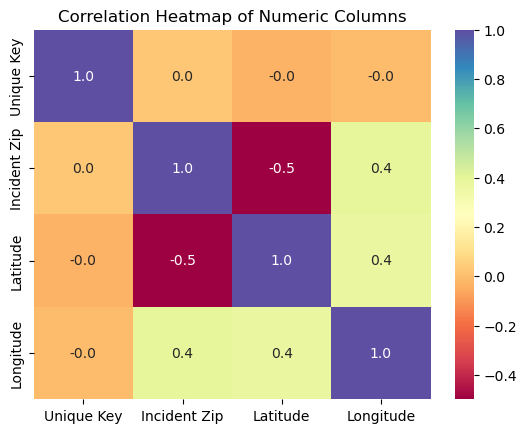

In [261]:
#showing correlation matrix for all numeric columns
numericcolumns = df.select_dtypes(include=['int','float'])
correlationmatrix = numericcolumns.corr()
print(correlationmatrix)
sns.heatmap(correlationmatrix, annot=True, cmap='Spectral', fmt=".1f")
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

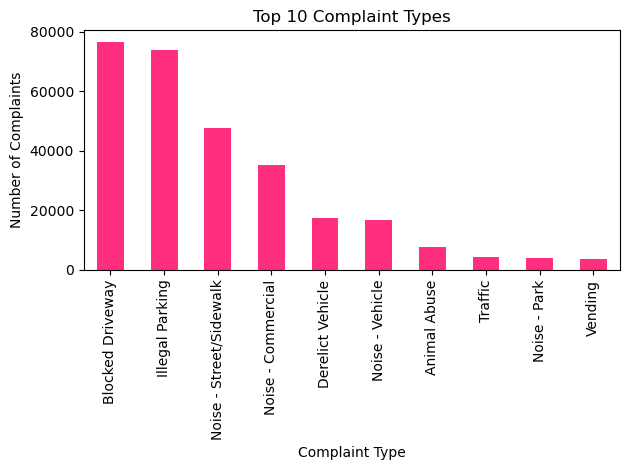

In [263]:
#showing top 10 Most Frequent Complaint Types
topcomplaints = df['Complaint Type'].value_counts().head(10)
topcomplaints.plot(kind='bar', color='#ff2e7e')
plt.title('Top 10 Complaint Types')
plt.xlabel('Complaint Type')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

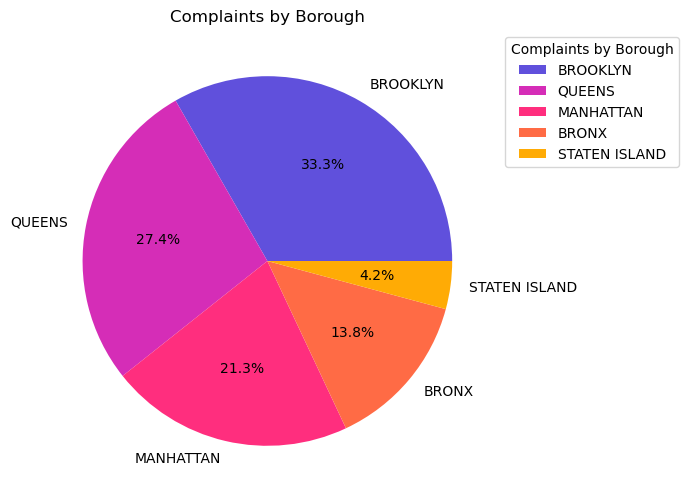

In [265]:
#showing complaints Distribution by Borough
boroughcomplaints = df['Borough'].value_counts()
boroughcomplaints.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), colors=['#6050dc','#d52db7','#ff2e7e','#ff6b45','#ffab05'])
plt.title('Complaints by Borough')
plt.ylabel('')
plt.legend(title='Complaints by Borough', bbox_to_anchor=(1, 1))
plt.show()

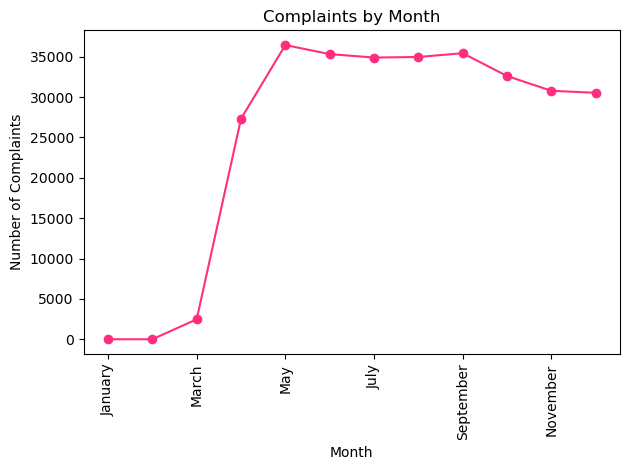

In [24]:
#showing peak months for complaints
df['Created_Month'] = df['Created Date'].dt.month_name()
monthlycomplaints = df['Created_Month'].value_counts().reindex(['January', 'February', 'March', 'April', 'May', 'June',
'July', 'August', 'September', 'October', 'November', 'December'],fill_value=0)
monthlycomplaints.plot(kind='line', color='#ff2e7e',  marker='o')
plt.title('Complaints by Month')
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=90)
plt.tight_layout()

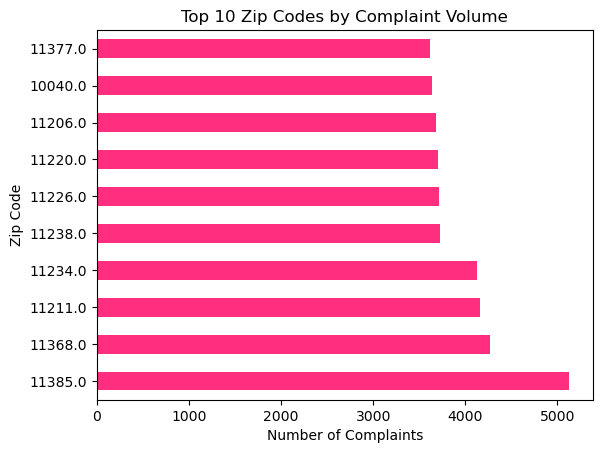

In [271]:
#showing top 10 Zip Codes with most complaints
zipcomplaints = df['Incident Zip'].value_counts().head(10)
zipcomplaints.plot(kind='barh', color='#ff2e7e')
plt.title('Top 10 Zip Codes by Complaint Volume')
plt.xlabel('Number of Complaints')
plt.ylabel('Zip Code')
plt.show()

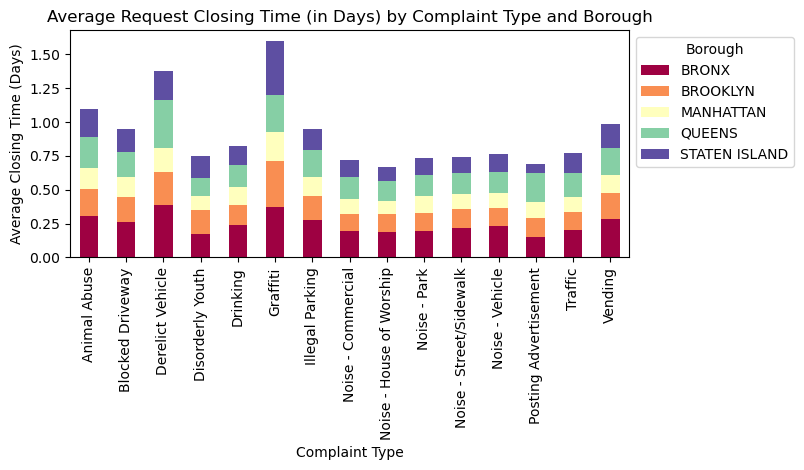

In [281]:
#arranging the complaint types according to their average 'Request_Closing_Time' (in days) across complaint types and boroughs 
#visualizing using stacked bar
df['Request_Closing_Time'] = df['Request_Closing_Time'].dt.total_seconds() / (60 * 60 * 24)
averageclosingtime = df.groupby(['Complaint Type', 'Borough'])['Request_Closing_Time'].mean().reset_index()
pivot_table = averageclosingtime.pivot(index='Complaint Type', columns='Borough', values='Request_Closing_Time')
pivot_table.plot(kind='bar', stacked=True, colormap='Spectral')
plt.title('Average Request Closing Time (in Days) by Complaint Type and Borough')
plt.xlabel('Complaint Type')
plt.ylabel('Average Closing Time (Days)')
plt.xticks(rotation=90)
plt.legend(title='Borough', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

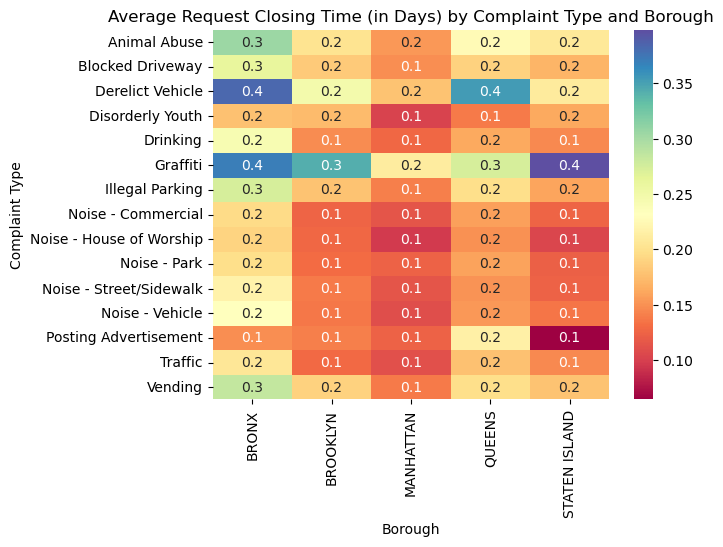

In [275]:
#arranging the complaint types according to their average 'Request_Closing_Time' (in days) across complaint types and boroughs 
#visualizing using heatmap
averageclosingtime = df.groupby(['Complaint Type', 'Borough'])['Request_Closing_Time'].mean().reset_index()
pivot_table = averageclosingtime.pivot(index='Complaint Type', columns='Borough', values='Request_Closing_Time')
sns.heatmap(pivot_table, cmap="Spectral", annot=True, fmt=".1f")
plt.title('Average Request Closing Time (in Days) by Complaint Type and Borough')
plt.xlabel('Borough')
plt.ylabel('Complaint Type')
plt.show()

In [311]:
#testing whether the average response time across complaint types is similar or not
df = df[df['Request_Closing_Time'].notnull() & (df['Request_Closing_Time'] >= 0)]
topcomplaintslist = df['Complaint Type'].value_counts().head(5).index
anova_data = [df[df['Complaint Type'] == complaint]['Request_Closing_Time'] for complaint in topcomplaintslist]
f_stat, p_value = f_oneway(*anova_data)
print('F-statistic:', f_stat)
print('P-value:', p_value)

F-statistic: 1789.8124885501416
P-value: 0.0


In [313]:
#testing whether the type of complaint or service requested and location are related
contingency_table = pd.crosstab(df['Complaint Type'], df['Borough'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print('Chi2 Statistic:', chi2)
print('P-value:', p)

Chi2 Statistic: 73264.62164334783
P-value: 0.0
